In [1]:
import h5py

dataPath = "data-15.07.08/7.1/000011.SZtick.mat"
f = h5py.File(dataPath,'r+')

In [4]:
list(f.keys())

['#refs#', 'r1']

In [5]:
f['r1'].keys()

<KeysViewHDF5 ['AccTurover', 'AccVolume', 'AskAvPrice', 'AskPrice', 'AskVolume', 'BSFlag', 'BidAvPrice', 'BidPrice', 'BidVolume', 'Code', 'CurDelta', 'Date', 'Downs', 'High', 'HoldLines', 'Index', 'Interest', 'Low', 'MatchItems', 'Open', 'Position', 'PreClose', 'PrePosition', 'PreSettle', 'Price', 'Settle', 'Stocks', 'Time', 'TotalAskVolume', 'TotalBidVolume', 'TradeFlag', 'Turover', 'Ups', 'Volume', 'WindCode']>

In [6]:
f['#refs#'].keys()

<KeysViewHDF5 ['a']>

In [2]:
import numpy as np
import pandas as pd
keys = ['AccTurover', 'AccVolume', 'AskAvPrice', 'AskPrice', 'AskVolume', 'BSFlag', 'BidAvPrice', 'BidPrice', 'BidVolume', 'Code', 'CurDelta', 'Date', 'Downs', 'High', 'HoldLines', 'Index', 'Interest', 'Low', 'MatchItems', 'Open', 'Position', 'PreClose', 'PrePosition', 'PreSettle', 'Price', 'Settle', 'Stocks', 'Time', 'TotalAskVolume', 'TotalBidVolume', 'TradeFlag', 'Turover', 'Ups', 'Volume', 'WindCode']
data = []
for key in keys:
    data.append(f['r1'][key])

In [24]:
S_n = np.sum(np.array(f['r1']['Price']),axis=0)
for i in range(S_n.shape[0]):
    if i+1 < S_n.shape[0]:
        S_n[i] = S_n[i+1] - S_n[i]
BidVolume = np.array(f['r1']['BidVolume'])
AskVolume = np.array(f['r1']['AskVolume'])
miu_n = BidVolume - AskVolume

In [25]:
miu_n_tmp = miu_n[0:1,:]
miu_n_final = np.sum(miu_n_tmp,axis=0)

Text(0, 0.5, 'miu_n')

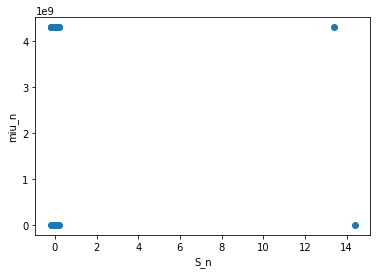

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(S_n,miu_n_final)
plt.xlabel('S_n')
plt.ylabel('miu_n')